<a href="https://colab.research.google.com/github/TeigenMillies/MAT422/blob/main/3_3_Unconstrained_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.3 Unconstrained Optimization
---------------------------------------------------------
- Necessary and sufficient conditions of local minimizers
- Convexity and global minimizers
- Gradient descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, solve

# 3.3.1. Necessary and sufficient conditions of local minimizers
We will be interested in unconstrained optimization of the form:

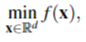

where f : Rᵈ → R. In this subsection, we defined several notions of solution
and derive characterizations. Ideally, we would like to find a global minimizer
to the optimization problem above.

Let f : Rᵈ → R. The point x* ∈ Rᵈ is a global minimizer of f over Rᵈ if

global minimizer.PNG

Often it is difficult to find a global minimizer unless some special structure
is present. Therefore weaker notions of solution have been introduced.

Let f : Rᵈ → R. The point x* ∈ Rd is a local minimizer of f over Rd if there is δ > 0 such that

local minimizer.PNG

If the inequality is strict, we say that x* is a strict local minimizer. x* is a local minimizer if there is open ball around x* where it attains the minimum value.

We will characterize local minimizers in terms of the gradient and Hessian of the function. We first need to define what a descent direction is, which generalizes the case when the derivative of a one dimensional function is negative.

In the one dimensional case, the necessary conditions previously
are generally not sufficient. We now state the following theorem which give a suﬀicient conditions for local minimizers.

Let f : Rᵈ → R be twice continuously differentiable on Rᵈ . If ∇f (x0) = 0 and H f (x0) is positive definite, then x0 is a strict local minimizer.

First derivative f'(x): 4*x**3 - 12*x**2 + 8*x
Critical points: [0, 1, 2]
Second derivative f''(x): 12*x**2 - 24*x + 8
x = 0 is a local minimizer.
x = 1 is a local maximizer.
x = 2 is a local minimizer.


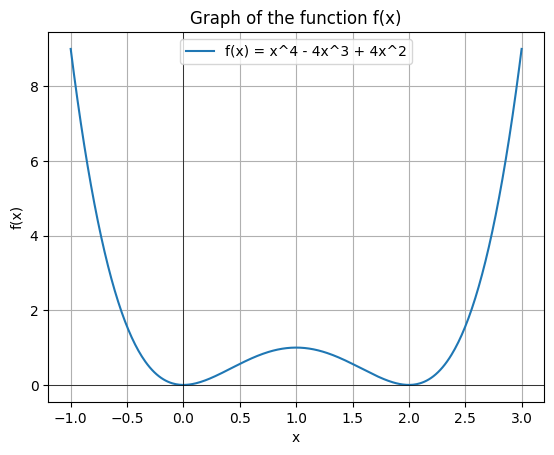

In [3]:
# Define variable and function
x = symbols('x')
f = x**4 - 4*x**3 + 4*x**2

# First derivative (Necessary condition)
f_prime = diff(f, x)
print("First derivative f'(x):", f_prime)

# Solve f'(x) = 0 to find critical points
cp = solve(f_prime, x)
print("Critical points:", cp)

# Second derivative (Sufficient condition)
f_2prime = diff(f_prime, x)
print("Second derivative f''(x):", f_2prime)

# Check the second derivative at each critical point
for point in cp:
    check = f_2prime.subs(x, point)
    if check > 0:
        print(f"x = {point} is a local minimizer.")
    elif check < 0:
        print(f"x = {point} is a local maximizer.")
    else:
        print(f"x = {point} is a saddle point (neither a min nor max).")

# Plot function
x_vals = np.linspace(-1, 3, 400)
y_vals = x_vals**4 - 4*x_vals**3 + 4*x_vals**2

plt.plot(x_vals, y_vals, label='f(x) = x^4 - 4x^3 + 4x^2')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graph of the function f(x)')
plt.grid(True)
plt.legend()
plt.show()

# 3.3.2. Convexity and global minimizers
A real-valued function is called convex if the line segment between any two
points on the graph of the function lies above the graph between the two
points. Our optimality conditions have only concerned local minimizers. Indeed, in the absence of global structure, local information such as gradients
and Hessians can only inform about the immediate neighborhood of points.
Here we consider convexity, under which local minimizers are also global
minimizers.

A set D ⊆ Rd is convex if for all x, y ∈ D and all α ∈ [0, 1]

(1 − α)x + αy ∈ D.

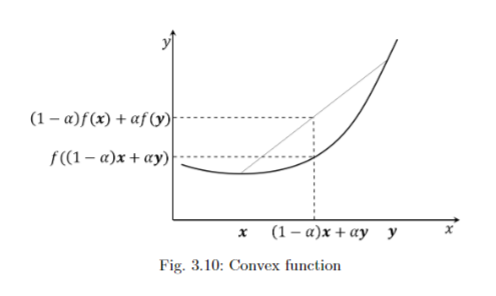

A common way to prove that a function is convex is to look at its Hessian.
We start with a first-order condition that will prove useful.

Let f : Rᵈ → R be continuously differentiable. Then f is convex if and only if for all x, y ∈ Rᵈ

f(y) ≥ f(x) + ∇ f(x)ᵀ (y − x).

For a convex function, suﬀicient (and therefore necessary) condition for minimizers is ∇ f(x0) = 0.

First derivative f'(x): 2*x - 6
Critical points (possible minimizer): [3]
Second derivative f''(x): 2
The function is convex.


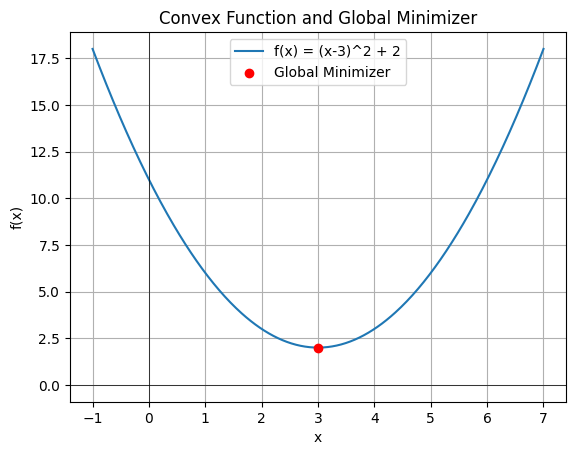

In [5]:
# Define variable and function
x = symbols('x')
f = (x - 3)**2 + 2

# First derivative (Necessary condition for local minimizer)
f_prime = diff(f, x)
print("First derivative f'(x):", f_prime)

# Solve f'(x) = 0 to find critical points
cp = solve(f_prime, x)
print("Critical points (possible minimizer):", cp)

# Second derivative to check convexity
f_2prime = diff(f_prime, x)
print("Second derivative f''(x):", f_2prime)

# Check if the second derivative is positive (which confirms convexity)
if f_2prime > 0:
    print("The function is convex.")

# Plot shape and minimizer
x_vals = np.linspace(-1, 7, 400)
y_vals = (x_vals - 3)**2 + 2

plt.plot(x_vals, y_vals, label='f(x) = (x-3)^2 + 2')
plt.scatter(cp[0], f.subs(x, cp[0]), color='red', zorder=5, label='Global Minimizer')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Convex Function and Global Minimizer')
plt.grid(True)
plt.legend()
plt.show()


# 3.3.3. Gradient descent
Gradient descent is an iterative optimization algorithm for finding a local
minimum of a differentiable function. Once we know a function has a mini-
mizer, we will discuss a class of algorithms known as gradient descent method
for solving optimization problems numerically. Let f : Rd → R is continuously
differentiable. We restrict ourselves to unconstrained minimization problems
of the form

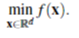

One might evaluate f at a large number of points x to identify a global minimizer of f . This naive approach seems too expensive. A less naive approach might be to find all stationary points of f , that is, those x’s such that ∇ f (x) = 0. And then choose that x among them that produces the smallest value of f (x). This indeed works in many problems.

The steepest descent approach is to find smaller values of f by successively
following directions in which f decreases. As we have seen in the proof of the
First-Order Necessary Condition, −∇ f provides such a direction.

Let f : Rd → R be continuously differentiable at x0. For any unit vector v ∈ Rᵈ

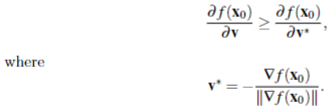

Iteration 1: x = 3.8, f(x) = 23.04, gradient = 12
Iteration 2: x = 2.84, f(x) = 14.7456, gradient = 9.6
Iteration 3: x = 2.072, f(x) = 9.437184, gradient = 7.68
Iteration 4: x = 1.4576, f(x) = 6.03979776, gradient = 6.144
Iteration 5: x = 0.9660799999999999, f(x) = 3.8654705664, gradient = 4.9152000000000005
Iteration 6: x = 0.5728639999999999, f(x) = 2.473901162496, gradient = 3.9321599999999997
Iteration 7: x = 0.2582911999999999, f(x) = 1.5832967439974397, gradient = 3.145728
Iteration 8: x = 0.00663295999999991, f(x) = 1.0133099161583614, gradient = 2.5165824
Iteration 9: x = -0.1946936320000001, f(x) = 0.6485183463413513, gradient = 2.01326592
Iteration 10: x = -0.3557549056000001, f(x) = 0.4150517416584647, gradient = 1.6106127359999998
Iteration 11: x = -0.4846039244800001, f(x) = 0.2656331146614175, gradient = 1.2884901887999998
Iteration 12: x = -0.5876831395840001, f(x) = 0.1700051933833071, gradient = 1.0307921510399998
Iteration 13: x = -0.6701465116672001, f(x) = 0.1088033

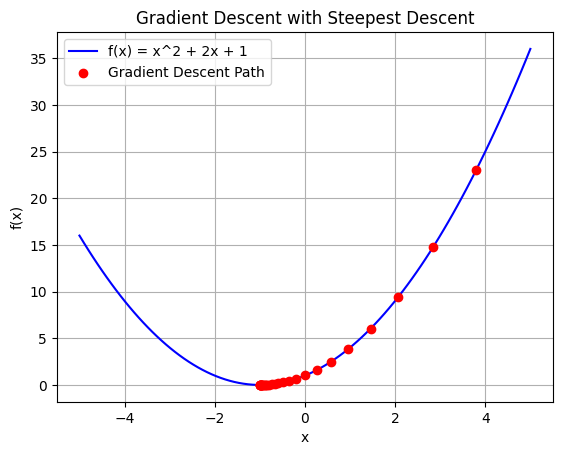

In [6]:
# Define function for different inputs
def f(x):
    return x**2 + 2*x + 1

# Define the gradient (derivative of the function)
def gradient(x):
    return 2*x + 2

# Gradient Descent Algorithm
def gradient_descent(learning_rate, initial_x, iterations):
    x = initial_x
    history = []  # Store x and f(x) at each iteration
    for i in range(iterations):
        grad = gradient(x)
        x = x - learning_rate * grad  # Update x in opposite direction of gradient
        history.append((x, f(x)))
        print(f"Iteration {i+1}: x = {x}, f(x) = {f(x)}, gradient = {grad}")
    return x, history

# Gradient descent params
initial_x = 5  # Starting point
rate = 0.1  # Step size
iterations = 30  # iterations

# Gradient descent
final_x, history = gradient_descent(rate, initial_x, iterations)

# Plot function and descent path
x_vals = np.linspace(-5, 5, 100)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label="f(x) = x^2 + 2x + 1", color="blue")
history_x = [h[0] for h in history]
history_y = [h[1] for h in history]
plt.scatter(history_x, history_y, color="red", zorder=5, label="Gradient Descent Path")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent with Steepest Descent')
plt.grid(True)
plt.legend()
plt.show()
